# House Price Prediction

In this kaggle challenge we are required to predict the final price of a house based on a set of different features (like number of bedrooms, garage size, year built, over all quality etc). There are a total of 79 different features for each house. 

We will do Exploratory Data Analysis , Data preprocessing, Feature Engineering and Model building to predict the target variable. 


In [1]:
#making the imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
sns.set_style('dark')
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#print the directory items
print(os.listdir('../input/house-prices-advanced-regression-techniques'))

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [3]:
#read the test and train files
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
print(df_train.head())
print('***************************************************\n')
print(df_test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
#checking the shape of train and test set

print('The shape of training set is: {}'.format(df_train.shape))
print('\n')
print('The shape of test set is: {}'.format(df_test.shape))

The shape of training set is: (1460, 81)


The shape of test set is: (1459, 80)


In [6]:
#assigning id column to this variable. we will use it later when writing the submission file. 
test_ID = df_test['Id']

#delete the id column from datasets
del df_train['Id']
del df_test['Id']

# Exploratory Data Analysis

In [7]:
#making the scatter plot
def scater_plot(x,y,x2,y2):
    plt.figure(figsize = (10,8))
    sns.scatterplot(x,y)
    plt.xlabel(x2,fontsize = 15)
    plt.ylabel(y2,fontsize = 15)
    plt.show()

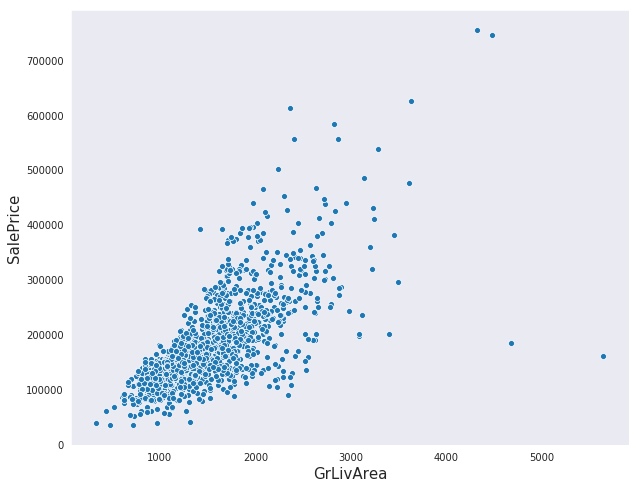

In [8]:
#scatter plot for living area vs sale price

scater_plot(df_train['GrLivArea'], df_train['SalePrice'], 'GrLivArea', 'SalePrice')

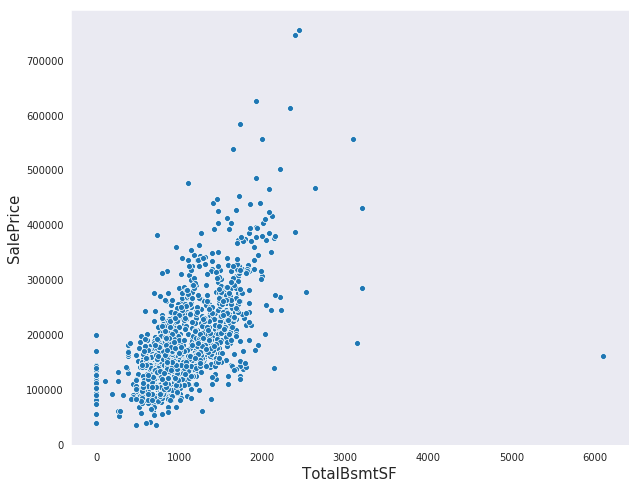

In [9]:
#scatter plot of Total basement vs sale price

scater_plot(df_train['TotalBsmtSF'], df_train['SalePrice'], 'TotalBsmtSF', 'SalePrice')

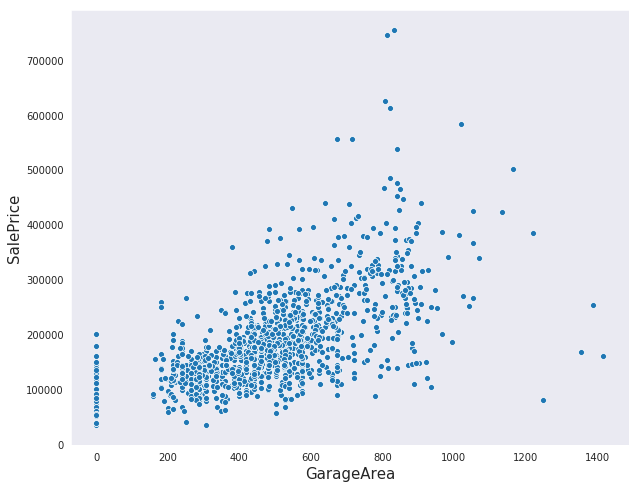

In [10]:
#scatter plot of Garage Area vs sale price

scater_plot(df_train['GarageArea'], df_train['SalePrice'], 'GarageArea', 'SalePrice')

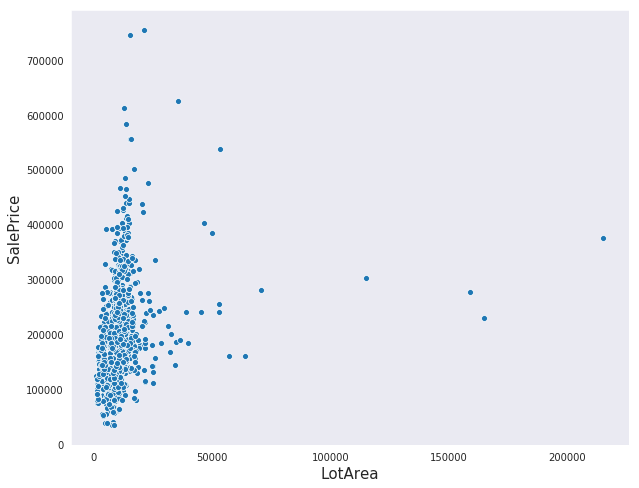

In [11]:
#scatter plot of Lot Area vs sale price

scater_plot(df_train['LotArea'], df_train['SalePrice'], 'LotArea', 'SalePrice')

The plot seems to be effected by the outliers. 

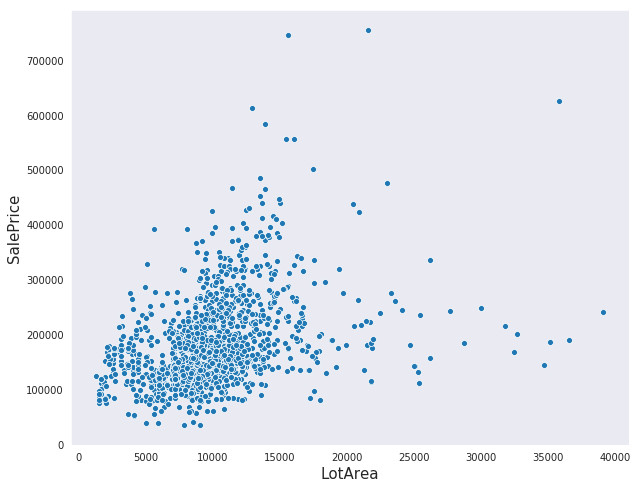

In [12]:
#remove the outliers and store data in a temp df to re-visualize the relation between
#lot area and sales price. Now we see bit of a linear relationship

temp_df = df_train[df_train['LotArea'] < 40000]
scater_plot(temp_df['LotArea'], temp_df['SalePrice'], 'LotArea', 'SalePrice')

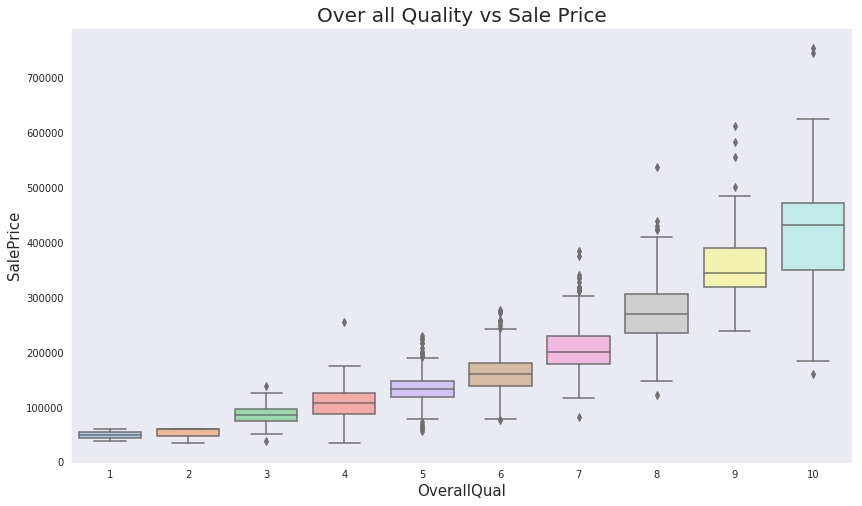

In [13]:
#making the box plot for over all quality vs the sale price

plt.figure(figsize = (14,8))
sns.boxplot(df_train['OverallQual'], df_train['SalePrice'], palette = 'pastel')
plt.xlabel('OverallQual', fontsize = 15)
plt.ylabel('SalePrice', fontsize = 15)
plt.title('Over all Quality vs Sale Price', fontsize = 20)
plt.show()

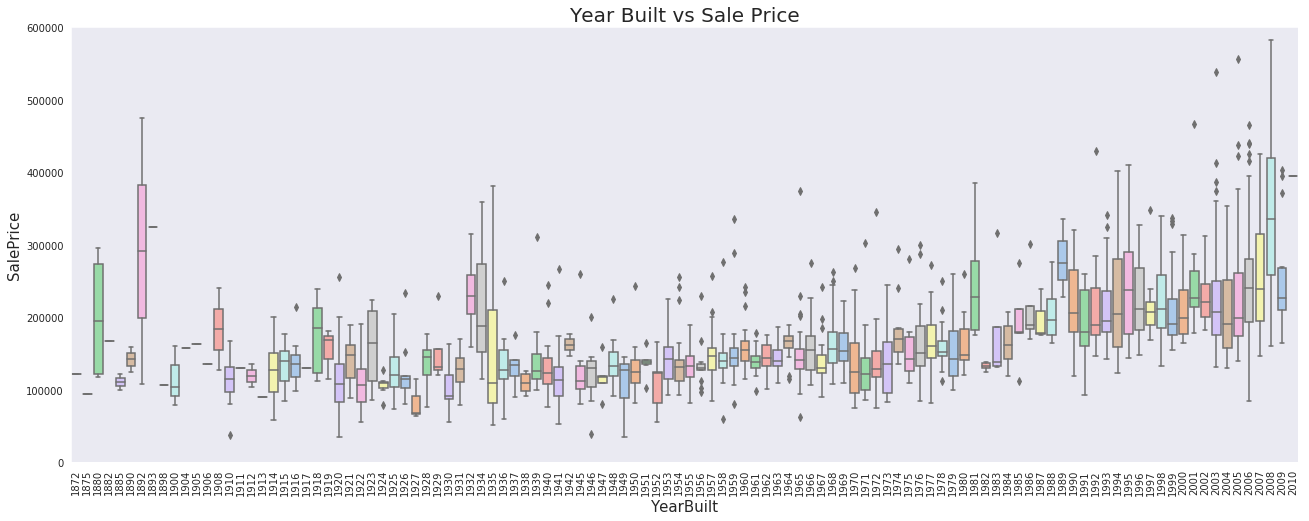

In [14]:
#making the box plot for year built vs the sale price

plt.figure(figsize = (22,8))
sns.boxplot(df_train['YearBuilt'], df_train['SalePrice'], palette = 'pastel')
plt.xlabel('YearBuilt', fontsize = 15)
plt.ylabel('SalePrice', fontsize = 15)
plt.title('Year Built vs Sale Price', fontsize = 20)
plt.axis(ymin=0, ymax=600000);
plt.xticks(rotation=90)
plt.show()

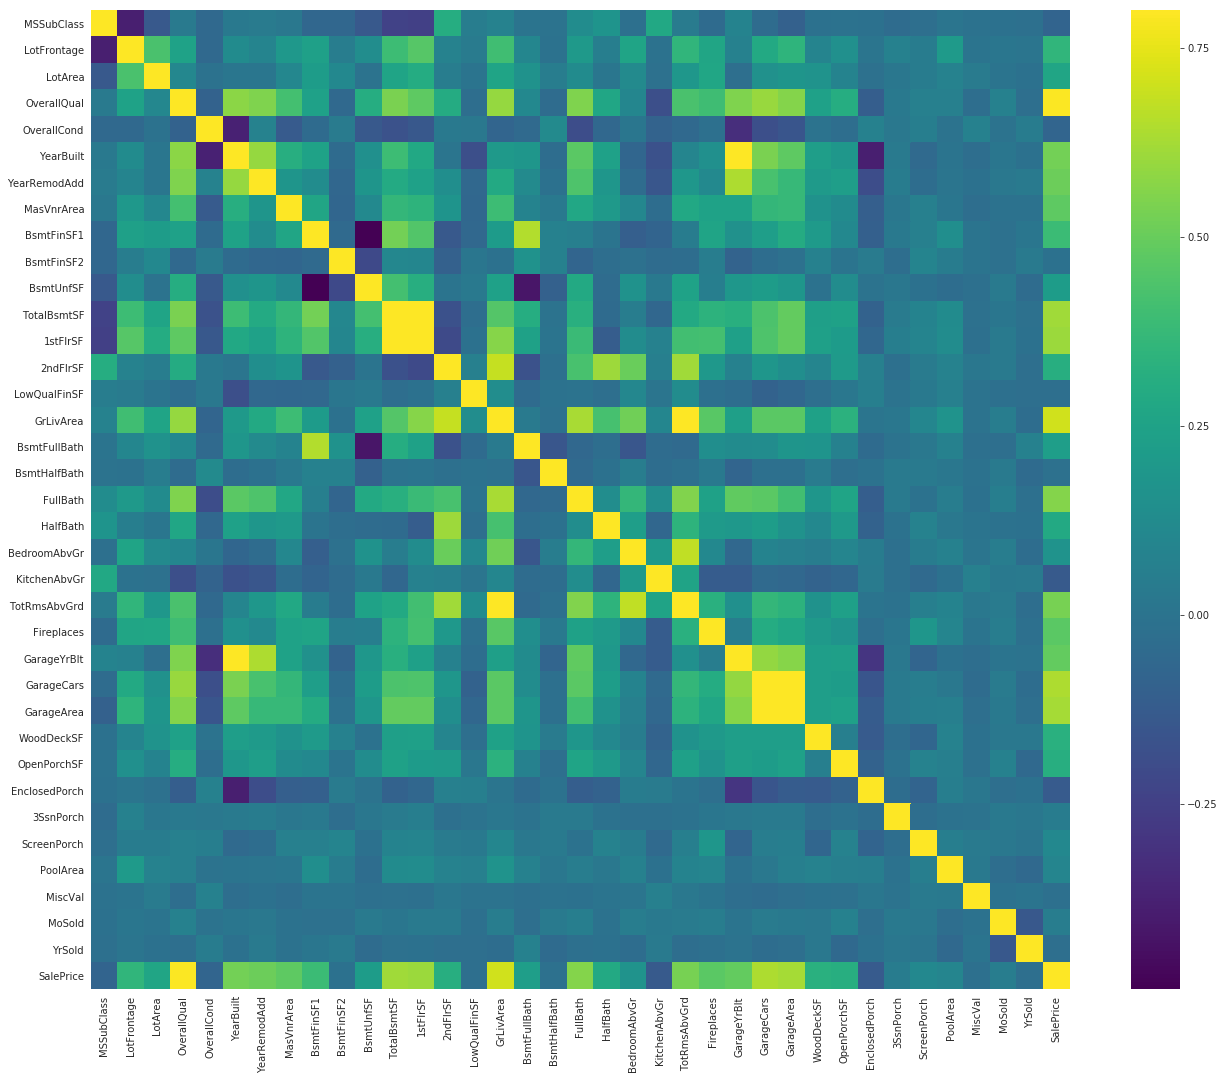

In [15]:
#correlation matrix for all features in training set

plt.figure(figsize = (22,18))
corrmat = df_train.corr()
sns.heatmap(corrmat, vmax=.8, square=True, cmap= 'viridis')
plt.show()

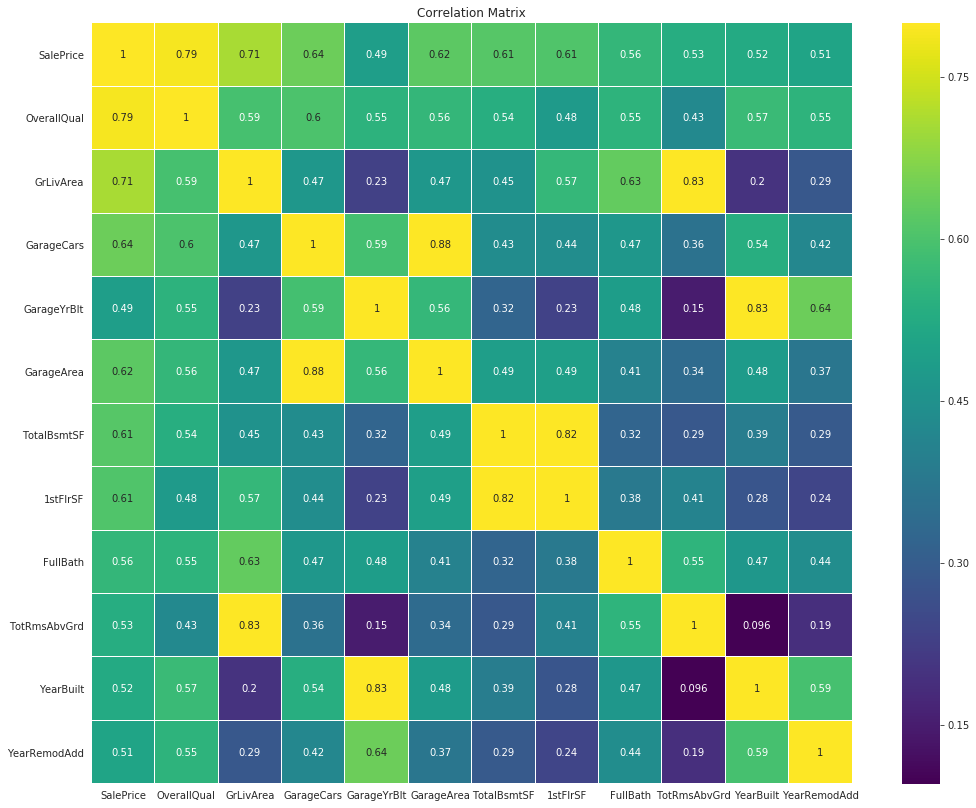

In [16]:
#lets visualize the correlation between less variable which are more correlated

plt.figure(figsize = (18,14))
corr_matrix = df_train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageYrBlt', 'GarageArea', 'TotalBsmtSF',
                       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']].corr()

sns.heatmap(corr_matrix, vmax = 0.8, linewidths= 0.01, square= True, 
           annot= True, cmap= 'viridis', linecolor= 'white')

plt.title('Correlation Matrix')
plt.show()

Skew is: 1.8828757597682129




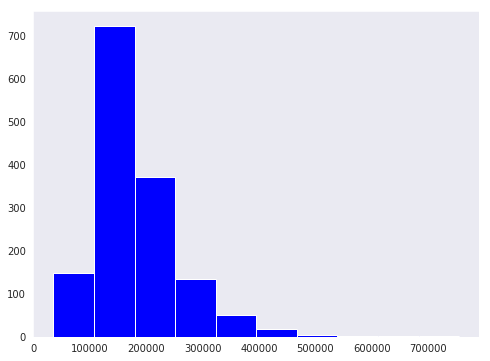

In [17]:
#check the distribution of target variable 

print ("Skew is:", df_train.SalePrice.skew())
print('\n')
plt.figure(figsize = (8,6))
plt.hist(df_train.SalePrice, color='blue')
plt.show()

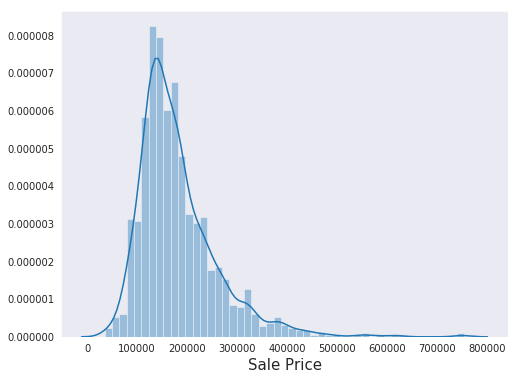

In [18]:
#making the distribution plot for sale price

plt.figure(figsize = (8,6))
sns.distplot(df_train['SalePrice'])
plt.xlabel('Sale Price', fontsize = 15)
plt.show()

# Data Preprocessing

In [19]:
#checking for numerical and categorical features

numerical_feats = df_train.dtypes[df_train.dtypes != 'object'].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == 'object'].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  43


In [20]:
#printing the columns

print(df_train[numerical_feats].columns)
print("*"*80)
print("*"*80)
print(df_train[categorical_feats].columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
********************************************************************************
********************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2n

In [21]:
#count and percent of missing values

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


## Imputing the missing values in Train Set

In [22]:
# Function for value counts in each columns

def cat_exploration(column):
    return df_train[column].value_counts()

# Function for Imputing the missing values

def cat_imputation(column, value):
    df_train.loc[df_train[column].isnull(),column] = value

In [23]:
#A number of values are missing and one possibility would be to just impute the mean. 
#However, there should actually be a correlation with LotArea, which has no missing values.
#check correlation of LotFrontage with LotArea

df_train['LotFrontage'].corr(df_train['LotArea'])

0.42609501877180833

In [24]:
# we assume that most lots are rectangular, using the square root might be an improvement.

df_train['SqrtLotArea']=np.sqrt(df_train['LotArea'])
df_train['LotFrontage'].corr(df_train['SqrtLotArea'])

0.6020022167939361

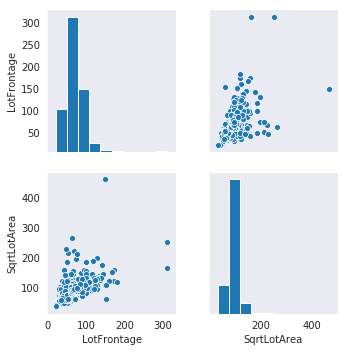

In [25]:
#see the pair plot for LotFrontage and SqrtLotArea

sns.pairplot(df_train[['LotFrontage','SqrtLotArea']].dropna())
plt.show()

In [26]:
#imputing the missing values in LotFrontage column

cond = df_train['LotFrontage'].isnull()
df_train.LotFrontage[cond]=df_train.SqrtLotArea[cond]

In [27]:
# This column is not needed now. lets delete it. 

del df_train['SqrtLotArea']

In [28]:
#value counts for  Alley column

cat_exploration('Alley')

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [29]:
# empty fields just means that there is no alley access so replace it with none

cat_imputation('Alley','None')

In [30]:
#value counts for MasVnrType

cat_exploration('MasVnrType')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [31]:
#fill the missing with None

cat_imputation('MasVnrType', 'None')

In [32]:
#value counts MasVnrArea
cat_exploration('MasVnrArea')

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [33]:
#0.0 is the most frequent value
cat_imputation('MasVnrArea', 0.0)

In [34]:
#doing the imputation for basement related columns

basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
df_train[basement_cols][df_train['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


So in the cases where the categorical variables are NaN, the numerical ones are 0. Which means there's no basement, so the categorical ones should also be set to "None".

In [35]:
#replace Nan with None

for cols in basement_cols:
    if 'FinSF'not in cols:
        cat_imputation(cols,'None')

In [36]:
#value counts for  Electrical column
cat_exploration('Electrical')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [37]:
#impute with the most occuring value

cat_imputation('Electrical', 'SBrkr')

In [38]:
#value counts for  fireplaceQu
cat_exploration('FireplaceQu')

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [39]:
#lets check the count of missing values

df_train['FireplaceQu'].isnull().sum()

690

In [40]:
#impute with none as these don't have a fireplace

cat_imputation('FireplaceQu','None')

In [41]:
#making corsstab with Fireplaces column

pd.crosstab(df_train.Fireplaces, df_train.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1


In [42]:
#now lets do it for Garages columns

garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
df_train[garage_cols][df_train['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


So in the cases where the categorical variables are NaN, the numerical ones are 0. Which means there's no Garage, so the categorical ones should also be set to "None".

In [43]:
#Garage Imputation - zero for numerical and none for categorical columns

for cols in garage_cols:
    if df_train[cols].dtype==np.object:
        cat_imputation(cols,'None')
    else:
        cat_imputation(cols, 0)

In [44]:
#value counts for PoolQC
cat_exploration('PoolQC')

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [45]:
#count of missing values
df_train['PoolQC'].isnull().sum()

1453

In [46]:
#seems like the missing are the ones where there is no pool in the house. lets put none there

cat_imputation('PoolQC', 'None')

In [47]:
#value counts for Fence column
cat_exploration('Fence')

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [48]:
#seems like missing ones are the ones with no Fence
cat_imputation('Fence', 'None')

In [49]:
#value counts for MiscFeatures
cat_exploration('MiscFeature')

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [50]:
#the missing ones are the ones where we don't have these features
cat_imputation('MiscFeature', 'None')

In [51]:
#Let's check if we still have missing values in training set

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


In [52]:
#we are done imputing the missing values :-)

df_train.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool

# Imputing the missing values in Test Set

**Now we will follow the above steps for test set as well.**

In [53]:
#count and percent of missing values

total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageQual,78,0.053461


In [54]:
# We will use the same two functions for value counts of a column and also for imputation. 
def cat_exploration(column):
    return df_test[column].value_counts()

# Function for Imputing the missing values

def cat_imputation(column, value):
    df_test.loc[df_test[column].isnull(),column] = value

In [55]:
# as we have already imputed missing values in training set
# lets do it the same way for test set for some columns which are matching 

cat_imputation('Alley','None')
cat_imputation('MasVnrType', 'None')
cat_imputation('MasVnrArea', 0.0)
cat_imputation('FireplaceQu','None')
cat_imputation('PoolQC', 'None')
cat_imputation('Fence', 'None')
cat_imputation('MiscFeature', 'None')

In [56]:
#imputation for basement columns

basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']

#replace Nan with None
for cols in basement_cols:
    if 'FinSF'not in cols:
        cat_imputation(cols,'None')

In [57]:
#imputation for garage columns

garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']

#Garage Imputation - zero for numerical and none for categorical columns
for cols in garage_cols:
    if df_test[cols].dtype==np.object:
        cat_imputation(cols,'None')
    else:
        cat_imputation(cols, 0)

In [58]:
#count and percent of missing values

total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
LotFrontage,227,0.155586
MSZoning,4,0.002742
Functional,2,0.001371
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Utilities,2,0.001371
BsmtUnfSF,1,0.000685
Exterior2nd,1,0.000685
BsmtFinSF2,1,0.000685
KitchenQual,1,0.000685


In [59]:
#A number of values are missing and one possibility would be to just impute the mean. 
#However, there should actually be a correlation with LotArea, which has no missing values.
# check correlation of LotFrontage with LotArea

df_test['LotFrontage'].corr(df_test['LotArea'])

0.6446084977757518

In [60]:
# we assume that most lots are rectangular, using the square root might be an improvement.

df_test['SqrtLotArea']=np.sqrt(df_test['LotArea'])
df_test['LotFrontage'].corr(df_test['SqrtLotArea'])


0.7030019347771301

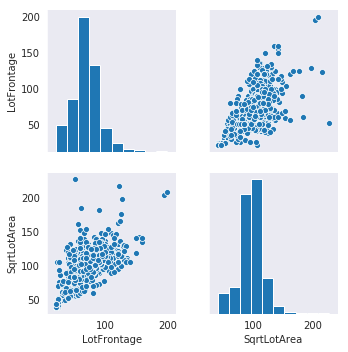

In [61]:
#see the pair plot for LotFrontage and SqrtLotArea

sns.pairplot(df_test[['LotFrontage','SqrtLotArea']].dropna())
plt.show()


In [62]:
#imputing the missing values in LotFrontage column

cond = df_test['LotFrontage'].isnull()
df_test.LotFrontage[cond]=df_test.SqrtLotArea[cond]


In [63]:
# This column is not needed now

del df_test['SqrtLotArea']

In [64]:
#count and percent of missing values

total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
MSZoning,4,0.002742
Functional,2,0.001371
Utilities,2,0.001371
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
BsmtFinSF2,1,0.000685
Exterior2nd,1,0.000685
KitchenQual,1,0.000685
Exterior1st,1,0.000685
BsmtUnfSF,1,0.000685


In [65]:
#value counts for total basement SF column

cat_exploration('TotalBsmtSF')

0.0       41
864.0     39
960.0     13
546.0     12
672.0     12
          ..
918.0      1
1910.0     1
1700.0     1
750.0      1
1075.0     1
Name: TotalBsmtSF, Length: 736, dtype: int64

In [66]:
#imputation for numerical columns

num_cols = ['BsmtHalfBath','BsmtFullBath', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFinSF1', 'TotalBsmtSF']

#replace with most frequent value which is 0.0

for col in num_cols:
    cat_imputation(col,'0.0')
    


In [67]:
#count and percent of missing values

total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
MSZoning,4,0.002742
Functional,2,0.001371
Utilities,2,0.001371
Exterior1st,1,0.000685
SaleType,1,0.000685
Exterior2nd,1,0.000685
KitchenQual,1,0.000685


In [68]:
#imputation for catrgory columns

cat_cols =['MSZoning', 'Functional', 'Utilities', 'Exterior1st', 'SaleType', 'Exterior2nd', 'KitchenQual']

#replace with none
for col in cat_cols:
    cat_imputation(col,'None')

In [69]:
#count and percent of missing values

total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent


In [70]:
#we are done imputing the missing values in test set.

df_test.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
Length: 79, dtype: bool

Now we can proceed to build our model. 

# Cat Boost

In [71]:
#lets put all features other than sale price in a list

features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

In [72]:
#create X and y to be used for training the model

X = df_train[features]
y = df_train.SalePrice

In [73]:
#divide the training set into train/validation set with 20% set aside for validation. 

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=101)

In [74]:
#as we know that we can give categorical features to catboost to make best use of its performance. 
#all categorical features will be where data type is not float

categorical_features_indices = np.where(X_train.dtypes != np.float)[0]

In [75]:
#importing catboost regressor and define key parameters
#we can play with some parameters like learning rate etc

from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=1000, 
                        depth=5, 
                        learning_rate=0.1,
                        loss_function='RMSE',
                        random_seed=1,
                        bagging_temperature=22,
                        od_type='Iter',
                        metric_period=100,
                        od_wait=100)

In [76]:
#train the model (1000 iterations)

model.fit(X_train, y_train,cat_features=categorical_features_indices,
          eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 181238.9676457	test: 178396.9135527	best: 178396.9135527 (0)	total: 124ms	remaining: 2m 3s
100:	learn: 32718.2602547	test: 39083.9909420	best: 39073.0988108 (97)	total: 5.64s	remaining: 50.2s
200:	learn: 29181.2432250	test: 37807.8569784	best: 37699.3629234 (198)	total: 11.2s	remaining: 44.4s
300:	learn: 26351.8728697	test: 37037.9010718	best: 37003.5397930 (299)	total: 16.7s	remaining: 38.8s
400:	learn: 23697.3359049	test: 36583.8490011	best: 36552.6280453 (393)	total: 22.3s	remaining: 33.3s
500:	learn: 21945.2251801	test: 36444.9681521	best: 36424.7035853 (499)	total: 27.9s	remaining: 27.8s
600:	learn: 20579.8683948	test: 36006.0834340	best: 36002.3583756 (599)	total: 33.5s	remaining: 22.2s
700:	learn: 19440.3724572	test: 35775.4260470	best: 35765.6900442 (698)	total: 39.1s	remaining: 16.7s
800:	learn: 18539.1012887	test: 35558.8836031	best: 35558.8836031 (800)	total: 44.7s	remaining: 11.1s
900:	learn: 17726.2129434	test: 35448.7791547	best: 35446.9986043 (894)	total: 50.3s

In [77]:
#as we can see that the model starts to overfit after 100 iterations
#so lets train a new model for 100 iterations only

model_2=CatBoostRegressor(iterations=100, 
                        depth=5, 
                        learning_rate=0.1,
                        loss_function='RMSE',
                        random_seed=1,
                        bagging_temperature=22,
                        od_type='Iter',
                        metric_period=100,
                        od_wait=100)

#train the model (100 iterations)

model_2.fit(X_train, y_train,cat_features=categorical_features_indices,
          eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 181197.2103248	test: 178278.0719768	best: 178278.0719768 (0)	total: 12.6ms	remaining: 1.25s


99:	learn: 33653.9501771	test: 41674.1963370	best: 41665.3705190 (97)	total: 878ms	remaining: 0us

bestTest = 41665.37052
bestIteration = 97

Shrink model to first 98 iterations.


In [78]:
#make the submission file

submission_02 = pd.DataFrame()
submission_02['Id'] = test_ID
submission_02['SalePrice'] = model.predict(df_test)
submission_02.to_csv("Submission_02.csv", index=False)

This Submission has a public leaderboard score of 0.16026 (position 3169 out of 4440). 

### So this is the end for this project. 

### We successfully did EDA, missing values imputation and build a model to make 
### predictions on test set.

### Further options could be to use different models like lightgbm, xgboost etc.